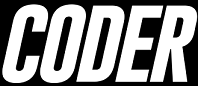

# Uso de spaCY

In [ ]:
!python -m spacy download es_core_news_sm
! pip install -U symspellpy
import nltk # importar natural language toolkit
nltk.download('punkt')
nltk.download('stopwords') # modulo para descargar stopwords en diferentes idiomas
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import numpy  as np
import re
import string
import plotly
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import time
import spacy
import es_core_news_sm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import pickle
from symspellpy import SymSpell
import pkg_resources
from symspellpy import SymSpell, Verbosity

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-02 22:40:03.553083: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-02 22:40:03.553180: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-02 22:40:03.553201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!python -m spacy download es_core_news_md

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-02 21:52:23.849015: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-02 21:52:23.849121: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-02 21:52:23.849144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
import es_core_news_md
nlp = es_core_news_md.load()

# Leer un string

In [ ]:
texto= ('Este es un tutorial acerca de Procesamiento de lenguaje usando Python con spaCy')
doc = nlp(texto)
#tokenizar
print([token.text for token in doc])

['Este', 'es', 'un', 'tutorial', 'acerca', 'de', 'Procesamiento', 'de', 'lenguaje', 'usando', 'Python', 'con', 'spaCy']


# Deteccion de oraciones

In [ ]:
text=('Gus es un desarrollador en Python actualmente trabajando para una compañia Fintech en Londres Inglaterra. Se encuentra interesado en aprender NLP.')
t=nlp(text)
oraciones= list(t.sents)
print(len(oraciones))
for x in oraciones:
  print(x)

2
Gus es un desarrollador en Python actualmente trabajando para una compañia Fintech en Londres Inglaterra.
Se encuentra interesado en aprender NLP.


# Tokenizacion

In [ ]:
for token in t:
  print(token, token.idx)

Gus 0
es 4
un 7
desarrollador 10
en 24
Python 27
actualmente 34
trabajando 46
para 57
una 62
compañia 66
Fintech 75
en 83
Londres 86
Inglaterra 94
. 104
Se 106
encuentra 109
interesado 119
en 130
aprender 133
NLP 142
. 145


In [ ]:
for token in t:
  print(token, token.idx, token.text_with_ws,
        token.is_alpha, token.is_punct, token.is_space,
        token.shape_, token.is_stop)

Gus 0 Gus  True False False Xxx False
es 4 es  True False False xx True
un 7 un  True False False xx True
desarrollador 10 desarrollador  True False False xxxx False
en 24 en  True False False xx True
Python 27 Python  True False False Xxxxx False
actualmente 34 actualmente  True False False xxxx False
trabajando 46 trabajando  True False False xxxx False
para 57 para  True False False xxxx True
una 62 una  True False False xxx True
compañia 66 compañia  True False False xxxx False
Fintech 75 Fintech  True False False Xxxxx False
en 83 en  True False False xx True
Londres 86 Londres  True False False Xxxxx False
Inglaterra 94 Inglaterra True False False Xxxxx False
. 104 .  False True False . False
Se 106 Se  True False False Xx True
encuentra 109 encuentra  True False False xxxx True
interesado 119 interesado  True False False xxxx False
en 130 en  True False False xx True
aprender 133 aprender  True False False xxxx False
NLP 142 NLP True False False XXX False
. 145 . False True Fals

En este ejemplo tenemos:

- text_with_ws imprime el texto del token
- is_alpha detecta si el token consiste en caracteres alfa numericos o no
- is_punct detecta si el token es un simbolo de puntuacion.
- is_space detecta si el token es un espacio o no.
- shape_ imprime el output shape de la palabra.
- is_stop detecta si es una stopword o no

# Stopwords

In [ ]:
import spacy
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS
print(len(spacy_stopwords))
for stop_word in list(spacy_stopwords)[:10]:
  print(stop_word)

521
algún
quienes
alrededor
diez
bastante
pasada
eran
lleva
después
primera


In [ ]:
for token in t:
  if not token.is_stop:
    print(token)

Gus
desarrollador
Python
actualmente
trabajando
compañia
Fintech
Londres
Inglaterra
.
interesado
aprender
NLP
.


In [ ]:
# Creacion adicional de stopwrods
documento_sin_stopword = [token for token in t if not token.is_stop]
print(documento_sin_stopword)

[Gus, desarrollador, Python, actualmente, trabajando, compañia, Fintech, Londres, Inglaterra, ., interesado, aprender, NLP, .]


# Lemantizacion

In [ ]:
for token in t:
  print(token, '-', token.lemma_)

Gus - Gus
es - ser
un - uno
desarrollador - desarrollador
en - en
Python - Python
actualmente - actualmente
trabajando - trabajar
para - para
una - uno
compañia - compañia
Fintech - Fintech
en - en
Londres - Londres
Inglaterra - Inglaterra
. - .
Se - él
encuentra - encontrar
interesado - interesado
en - en
aprender - aprender
NLP - NLP
. - .


# Word Frequency

In [ ]:
texto= '''
La FIFA responde así a una denuncia interpuesta por la Federación de Chile ante esa Comisión Disciplinaria, en la que presentaba alegaciones sobre la posible falsificación de los documentos que conceden la nacionalidad ecuatoriana Byron Castillo.

La selección de Ecuador se clasificó de forma directa para el Mundial, junto con las de Brasil, Argentina y Uruguay, al contrario que las de Chile y Perú. El combinado peruano, que terminó quinto por detrás del ecuatoriano, disputará una repesca.

El defensa fue alineado por el seleccionador ecuatoriano Gustavo Alfaro para los dos partidos contra Paraguay y Chile y en una ocasión ante Uruguay, Bolivia, Venezuela y Argentina, partidos clave para que el equipo lograse uno de los cupos directos para el Mundial.

"Innumerables pruebas de que nació en Colombia"
La Federación de Chile denunció el pasado día 5 que hay "innumerables pruebas de que el jugador nació en Colombia".

"Las investigaciones realizadas en Ecuador, entre ellas, un informe jurídico de la Dirección Nacional de Registro Civil, declararon la existencia de inconsistencias en el certificado de nacimiento presentado por el jugador", afirmó este organismo, que acusó a la Federación Ecuatoriana de tener "total conocimiento" de las irregularidades.

Una posible sanción de la FIFA podría implicar la resta de puntos a Ecuador por los partidos que Castillo jugó, lo que alteraría la nómina de clasificados.

Un informe técnico jurídico de la dirección nacional del registro civil de Ecuador afirma que la inscripción de nacimiento de Byron Castillo en la ciudad ecuatoriana de Guayas no consta en el tomo, la página y el acta solicitado, según un documento oficial.
'''

In [ ]:
type(texto)

str

In [ ]:
import re
texto1 = re.sub('\n', '', texto) #remover saltos de linea
print(type(texto))
str(texto1)

<class 'str'>


'La FIFA responde así a una denuncia interpuesta por la Federación de Chile ante esa Comisión Disciplinaria, en la que presentaba alegaciones sobre la posible falsificación de los documentos que conceden la nacionalidad ecuatoriana Byron Castillo.La selección de Ecuador se clasificó de forma directa para el Mundial, junto con las de Brasil, Argentina y Uruguay, al contrario que las de Chile y Perú. El combinado peruano, que terminó quinto por detrás del ecuatoriano, disputará una repesca.El defensa fue alineado por el seleccionador ecuatoriano Gustavo Alfaro para los dos partidos contra Paraguay y Chile y en una ocasión ante Uruguay, Bolivia, Venezuela y Argentina, partidos clave para que el equipo lograse uno de los cupos directos para el Mundial."Innumerables pruebas de que nació en Colombia"La Federación de Chile denunció el pasado día 5 que hay "innumerables pruebas de que el jugador nació en Colombia"."Las investigaciones realizadas en Ecuador, entre ellas, un informe jurídico de 

In [ ]:
doc= nlp(texto1)
# Remover stopwrods
words= [token.text for token in doc if not token.is_stop and not token.is_punct]
from collections import Counter
word_freq= Counter(words)
# Sacar las 5 mas frecuentes y sus frecuencias
common_words= word_freq.most_common(5)
print(common_words)
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print(unique_words)

[('Chile', 4), ('Ecuador', 4), ('Federación', 3), ('Castillo', 3), ('partidos', 3)]
['responde', 'denuncia', 'interpuesta', 'Comisión', 'Disciplinaria', 'presentaba', 'alegaciones', 'falsificación', 'documentos', 'conceden', 'nacionalidad', 'selección', 'clasificó', 'forma', 'directa', 'Brasil', 'contrario', 'Perú', 'combinado', 'peruano', 'terminó', 'quinto', 'disputará', 'repesca', 'defensa', 'alineado', 'seleccionador', 'Gustavo', 'Alfaro', 'Paraguay', 'ocasión', 'Bolivia', 'Venezuela', 'clave', 'equipo', 'lograse', 'cupos', 'directos', '"Innumerables', 'Colombia"La', 'denunció', '5', 'innumerables', 'Colombia"', '"Las', 'investigaciones', 'realizadas', 'Dirección', 'Nacional', 'Registro', 'Civil', 'declararon', 'existencia', 'inconsistencias', 'certificado', 'presentado', 'organismo', 'acusó', 'Ecuatoriana', 'conocimiento', 'irregularidades', 'sanción', 'implicar', 'resta', 'puntos', 'jugó', 'alteraría', 'nómina', 'clasificados', 'técnico', 'dirección', 'nacional', 'registro', 'civ

# POS Tagging

In [ ]:
for token in doc:
  print(token,' -', token.tag_, ' -', token.pos_,' -' ,spacy.explain(token.tag_))

La  - DET  - DET  - determiner
FIFA  - PROPN  - PROPN  - proper noun
responde  - VERB  - VERB  - verb
así  - ADV  - ADV  - adverb
a  - ADP  - ADP  - adposition
una  - DET  - DET  - determiner
denuncia  - NOUN  - NOUN  - noun
interpuesta  - ADJ  - ADJ  - adjective
por  - ADP  - ADP  - adposition
la  - DET  - DET  - determiner
Federación  - PROPN  - PROPN  - proper noun
de  - ADP  - ADP  - adposition
Chile  - PROPN  - PROPN  - proper noun
ante  - ADP  - ADP  - adposition
esa  - DET  - DET  - determiner
Comisión  - PROPN  - PROPN  - proper noun
Disciplinaria  - PROPN  - PROPN  - proper noun
,  - PUNCT  - PUNCT  - punctuation
en  - ADP  - ADP  - adposition
la  - DET  - DET  - determiner
que  - PRON  - PRON  - pronoun
presentaba  - VERB  - VERB  - verb
alegaciones  - NOUN  - NOUN  - noun
sobre  - ADP  - ADP  - adposition
la  - DET  - DET  - determiner
posible  - ADJ  - ADJ  - adjective
falsificación  - NOUN  - NOUN  - noun
de  - ADP  - ADP  - adposition
los  - DET  - DET  - determiner
docum

1. tag_ listas las estructuras finas del POS
2. pos_ lista la estructuras gruesas del POS
3. spacy.explain da los detalles descriptivos sobre un POS particular

In [ ]:
nouns=[]
adjectives=[]
for token in doc:
  if token.pos_ =='NOUN':
    nouns.append(token)
  if token.pos_ =='ADJ':
    adjectives.append(token)
print(nouns)
print(adjectives)

[denuncia, alegaciones, falsificación, documentos, nacionalidad, selección, forma, contrario, combinado, ecuatoriano, repesca, defensa, seleccionador, partidos, ocasión, partidos, clave, equipo, cupos, pruebas, Colombia"La, día, pruebas, jugador, Colombia", investigaciones, informe, existencia, inconsistencias, certificado, nacimiento, jugador, organismo, conocimiento, irregularidades, sanción, resta, puntos, partidos, nómina, clasificados, informe, dirección, registro, inscripción, nacimiento, ciudad, tomo, página, acta, documento]
[interpuesta, posible, ecuatoriana, directa, junto, peruano, ecuatoriano, directos, "Innumerables, pasado, innumerables, realizadas, jurídico, presentado, total, posible, técnico, jurídico, nacional, civil, ecuatoriana, solicitado, oficial]


# Visualizacion usando spaCY

In [ ]:
from spacy import displacy
texto = ('el se encuentra interesado en aprender Procesamiento de Lenguaje Natural')
t = nlp(texto)
displacy.render(t, style='dep',jupyter=True)

# Caso aplicado: ¿Cómo podemos predecir el sentimiento asociado con una interacción con el cliente?

In [ ]:
import os
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

from pylab import rcParams
from wordcloud import WordCloud
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

rcParams['figure.figsize'] = 30, 60
%matplotlib inline

# Metas

Después de trabajar en este caso, debería poder aplicar el análisis de sentimientos a los problemas comerciales. Comprenderá cómo utilizar técnicas de clasificación de texto para crear un modelo de análisis de opiniones y podrá aplicar modelos de opiniones a datos del mundo real.

Habrá adquirido experiencia en el uso de varias técnicas diferentes de vectorización y creación de modelos, utilizando bibliotecas populares de Python como scikit-learn y gensim. Habrá utilizado tanto vectorizaciones basadas en conteo como incrustaciones de palabras, y comprenderá los pros y los contras de cada una.

# Introducción
**Contexto empresarial**. Eres un científico de datos para una gran empresa de comercio electrónico. Tienes decenas de miles de clientes que escriben reseñas sobre productos cada día. Cada revisión contiene comentarios textuales junto con un sistema de calificación de 1 a 5 estrellas (siendo 1 la menos satisfecha y 5 la más satisfecha).

También tiene un equipo de atención al cliente que interactúa con los clientes a través de servicios de llamadas y mensajes. Su empresa también recopila comentarios sobre las experiencias de sus clientes con la interacción del sitio web después de cada compra. Ni este comentario ni el servicio de mensajería tienen un número de calificación. La empresa quiere cuantificar la satisfacción del cliente proveniente de estas interacciones no calificadas para ayudar con futuras decisiones comerciales (por ejemplo, determinar qué tan bien se están desempeñando sus diversos agentes de servicio al cliente).

**Problema de negocio** Su tarea es construir modelos que puedan identificar el sentimiento (positivo o negativo) de cada una de estas interacciones no calificadas.

**Contexto analitico** Los datos son un conjunto de reseñas en formato de archivo CSV. Combinaremos lo que aprendimos sobre el procesamiento de texto y los modelos de clasificación para desarrollar algoritmos capaces de clasificar las interacciones por sentimiento.

El caso está estructurado de la siguiente manera: 1) leerá y analizará los datos del texto de entrada y las variables de respuesta correspondientes (calificaciones); 2) realizara un preprocesamiento básico para preparar los datos para el modelado; 3) aprendera y aplicara varias formas de caracterizar el texto de reseñas; y finalmente 4) construira modelos de aprendizaje automático para clasificar el texto como mostrando un sentimiento positivo o negativo (1 o 0).

# Lectura de datos y analisis basico

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [ ]:
import pandas as pd
amazon_reviews = pd.read_csv('Reviews.csv')
# Seleccionando solo los primeros 10,000 registros para calculo mas rapido
#amazon_reviews = amazon_reviews[:10000]
amazon_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
amazon_reviews.shape

(568454, 10)

Columnas del dataset:

- **ID**: valor unico para cada fila
- **ProductId**: una referencia del producto sobre la reseña
- **UserId**: una referencia del usuario que dejo el review
- **HelpfulnessNumerator**: numero de lectores que han indicado que la reseña ayuda o es interesante
- **HelpfulnessDenominator**: numero total de personas que han dado una indicacion de si la reseña ha sido util o no
- **Score**:  rating (1-5)
- **Time**: fecha formato timestamp que indica cuando se creo la revision
- **Summary**: El resumen escrito por el usuario de lo que trata la reseña
- **Text**: la revisión escrita por el usuario

Miremos la distribucion del numero de palabras por review

Text(0, 0.5, 'Frecuencia')

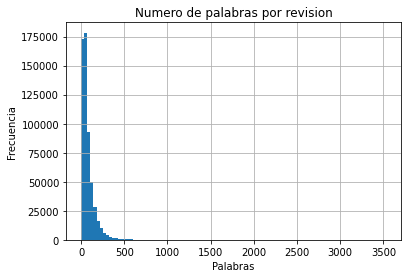

In [ ]:
words_per_review = amazon_reviews.Text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.title('Numero de palabras por revision')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

In [ ]:
words_per_review.mean()

82.00552199474363

Distrobucion de los ratings

In [ ]:
amazon_reviews.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [ ]:
percent_val = 100 * amazon_reviews.Score.value_counts()/amazon_reviews.shape[0]
percent_val

5    63.878871
4    14.188483
1     9.194763
3     7.501047
2     5.236835
Name: Score, dtype: float64

Text(0, 0.5, 'Porcentaje (%)')

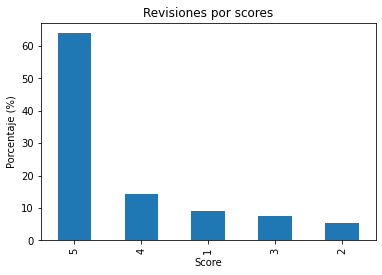

In [ ]:
percent_val.plot.bar()
plt.title('Revisiones por scores')
plt.xlabel('Score')
plt.ylabel('Porcentaje (%)')

la distribucion es asimetrica, con un gran valor para los ratings de 5s y pocos par 3,2 y 1

# Wordcloud

In [ ]:
amazon_reviews.Text -
amazon_reviews['Text']

247972188


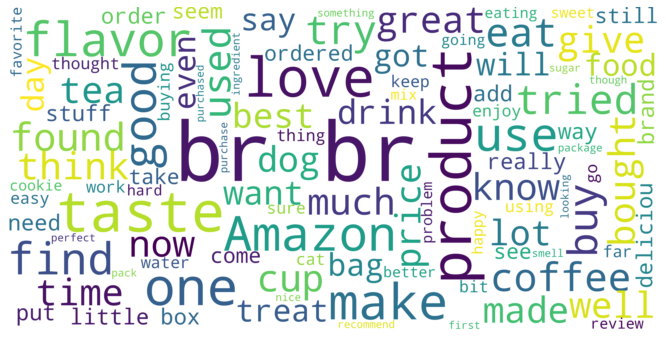

In [ ]:
word_cloud_text = ''.join(amazon_reviews.Text)
print(len(word_cloud_text))

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

El wordcloud muestra que hat muchos reviews que hablan sobre temas de comida (cafe, sabores, sabor, bebidas), tambien se observan otras palabras como bueno, amor y el mejor

# Estandarizacion de ratings para analisis de sentimiento

Para propositos del analisis de sentimiento convertiremos todos los ratings en valores binarios con las siguientes reglas:
- ratings de 4 o 5 seran convertidos a 1 (positivo)
- ratings de 1 o 2 seran convertidos a 0 (negativo)
- ratings de 3 seran removidos del analisis

In [ ]:
amazon_reviews['Sentiment_rating'] = np.where(amazon_reviews.Score > 3, 1, 0)
amazon_reviews['Sentiment_rating'].value_counts()

1    443777
0    124677
Name: Sentiment_rating, dtype: int64

!= negativo

In [ ]:
# removiendo neutrales
amazon_reviews = amazon_reviews[amazon_reviews.Score != 3]

Text(0, 0.5, 'Frecuencia')

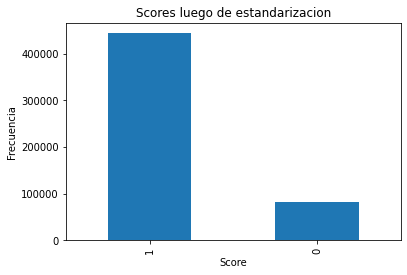

In [ ]:
#rcParams['figure.figsize'] = 8, 5
amazon_reviews.Sentiment_rating.value_counts().plot.bar()
plt.title('Scores luego de estandarizacion')
plt.xlabel('Score')
plt.ylabel('Frecuencia')

# Preprocesamiento

Recordemos que el preprocesamiento de texto y la normalizacion es crucial antes de desarrollar un modelo de NLP, algunos pasos importantes son:
1. Convertir palabras a minusculas
2. remover caracteres especiales
3. remover stopwords y palabras de alta frecuencia
4. Stemming y lemantizacion

Procedamos con la primera fase

In [ ]:
amazon_reviews['reviews_text_new'] = amazon_reviews.Text.apply(lambda x: x.lower())

Las siguientes fases:

In [ ]:
from nltk import word_tokenize
import nltk

nltk.download('punkt')

token_lists = [word_tokenize(each) for each in amazon_reviews.Text]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos antes: ", len(set(tokens)))

token_lists_lower = [word_tokenize(each) for each in amazon_reviews.reviews_text_new]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Numero de tokens unicos nuevos: ", len(set(tokens_lower)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Numero de tokens unicos antes:  240699
Numero de tokens unicos nuevos:  197737


In [ ]:
(22865-27899)/27899

-0.18043657478762679

El numero de tokens han bajado en cerca del 18% con la normalizacion

¿Es la eliminación de caracteres especiales incluso una buena idea? ¿Cuáles son algunos ejemplos de caracteres que probablemente sería seguro eliminar y cuáles no?

Eliminar caracteres especiales es una decisión subjetiva, especialmente en casos como este. Las personas a menudo usan caracteres especiales para expresar sus emociones y pueden dejar una reseña como "¡¡¡Este producto es el peor!!!", mientras que una reseña positiva podría ser "Este producto es el mejor". ¡Me encantó!' Aquí, la presencia de signos de exclamación indica claramente algo sobre el sentimiento subyacente, por lo que eliminarlos puede no ser una buena idea.

Por otro lado, eliminar la puntuación sin carga emocional, como las comas, los puntos y el punto y coma, probablemente sea seguro.

En aras de la simplicidad, procederemos eliminando todos los caracteres especiales; sin embargo, vale la pena tener en cuenta que esto es algo para revisar dependiendo de los resultados que obtengamos más adelante. Lo siguiente da una lista de todos los caracteres especiales en nuestro conjunto de datos:

In [ ]:
# Seleccionando los caracteres no alfa numericos que no son espacios
special_chars = amazon_reviews.reviews_text_new.apply(lambda x: [each for each in list(x) if not each.isalnum() and each != ' '])

# obtener una lista de listas
flat_list = [item for sublist in special_chars for item in sublist]

# caracteres especiales unicos
print(set(flat_list))

{'&', '@', ',', '#', '!', ')', '-', '_', '>', '$', '^', '×', '[', '»', '¢', '\x06', '=', '¨', '©', '°', '¦', '%', '\xad', '¬', '{', '±', '§', ':', '}', '.', '`', "'", '+', '?', '·', '\x07', ']', '®', '(', '"', '\x99', '\\', '/', '£', '|', '\x0f', '*', ';', '\x10', '<', '«', '\x0c', '~'}


Ahora removamos los caracteres especiales de los reviews

In [ ]:
import re
review_backup = amazon_reviews.reviews_text_new.copy()
amazon_reviews.reviews_text_new = amazon_reviews.reviews_text_new.apply(
    lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)
)

Miremos como se ven algunos de los resultados luego de remover esto

In [ ]:
print("Review anterior:")
review_backup.values[6]

Review anterior:


"this saltwater taffy had great flavors and was very soft and chewy.  each candy was individually wrapped well.  none of the candies were stuck together, which did happen in the expensive version, fralinger's.  would highly recommend this candy!  i served it at a beach-themed party and everyone loved it!"

In [ ]:
print("Review nuevo:")
amazon_reviews.reviews_text_new[6]

Review nuevo:


'this saltwater taffy had great flavors and was very soft and chewy   each candy was individually wrapped well   none of the candies were stuck together  which did happen in the expensive version  fralinger s   would highly recommend this candy   i served it at a beach themed party and everyone loved it '

El numero de tokens unicos que se han borrado son

In [ ]:
token_lists = [word_tokenize(each) for each in amazon_reviews.Text]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de token unicos antes: ", len(set(tokens)))

token_lists = [word_tokenize(each) for each in amazon_reviews.reviews_text_new]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos despues: ", len(set(tokens)))

## stopwords y palabras de alta/baja frecuencia

Vamos a remover estas palabras

In [ ]:
import nltk
nltk.download('stopwords')

noise_words = []
stopwords_corpus = nltk.corpus.stopwords
eng_stop_words = stopwords_corpus.words('english')
noise_words.extend(eng_stop_words)
print(len(noise_words))
noise_words

Encontremos las palabras de alta y baja frecuencia, que definiremos como el 1 % de las palabras que aparecen con más frecuencia en las reseñas, así como el 1 % de las palabras que aparecen con menos frecuencia en las reseñas (después de ajustar por mayúsculas y minúsculas y caracteres especiales).

In [ ]:
one_percentile = int(len(set(tokens)) * 0.01)
top_1_percentile = Counter(tokens).most_common(one_percentile)
top_1_percentile[:10]

In [ ]:
pd.DataFrame(top_1_percentile[:10], columns=['Palabras','Frecuencia']).set_index('Palabras').plot(kind='bar')
plt.title('Percentil 1 de palabras mas frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

In [ ]:
bottom_1_percentile = Counter(tokens).most_common()[-one_percentile:]
bottom_1_percentile[:10]

In [ ]:
noise_words.extend([word for word,val in top_1_percentile])
noise_words.extend([word for word,val in bottom_1_percentile])

Las stopwords y las palabras de alta/baja frecuencia ahora se han agregado a noise_words, que se eliminarán de las revisiones antes de entrenar los modelos de aprendizaje automático.

Es poco probable que las stopwords sean tan útiles, ya que esperamos que aparezcan con la misma frecuencia en las críticas positivas y negativas. Las palabras poco comunes pueden ser más significativas y, en teoría, podrían indicar el sentimiento de la revisión

# Stemming y Lemantizacion

Si quieren profundizar en los conceptos de [stemming](http://www.nltk.org/api/nltk.stem.html?highlight=lemmatizer), y[lemmatization](http://www.nltk.org/api/nltk.stem.html?highlight=lemmatizer#module-nltk.stem.wordnet) y otros tipos de normalizaciones pueden encontrar una buena introduccion en: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html.

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer

nltk.download('wordnet')

from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Los algoritmos de **Stemming** funcionan cortando el final o el principio de la palabra, teniendo en cuenta una lista de prefijos y sufijos comunes que se pueden encontrar.

Por otro lado, la **lematización** toma en consideración el análisis morfológico de las palabras. Por lo tanto, la **lematización** tiene en cuenta la gramática de la palabra e intenta encontrar la palabra raíz en lugar de simplemente llegar a la palabra raíz mediante métodos de fuerza bruta.

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Proveer una palabra que sera lemantizada
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


Se puede ver que obtenemos una raíz de significado de Lemmatizer, mientras que Stemmer simplemente recorta y extrae la primera parte importante de la palabra.

# Creacion de modelo de ML

In [ ]:
amazon_reviews[['Text','Score','Sentiment_rating']].head(5)

KeyError: ignored

Las variables independientes o características del modelo se derivan del texto de revisión. Previamente, discutimos cómo podemos usar **n-grams** para crear características, y específicamente cómo la bolsa de palabras es la interpretación más simple de estos n-gramas, sin tener en cuenta el orden y el contexto por completo y solo enfocándonos en la frecuencia/recuento. Usemos eso como punto de partida.

# Bag of words

CountVectorizer es una clase de Python que da cuenta automáticamente de ciertos pasos de preprocesamiento, como la eliminación de palabras vacías, la derivación, la creación de n-gramas y la tokenización de palabras:

In [ ]:
# Creacion de metodo para stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

Usemos esto para crear una bolsa de palabras de las reseñas, excluyendo las palabras irrelevantes que identificamos anteriormente:

In [ ]:
# Creacion de un objeto tipo CountVectorizer
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=noise_words,
    ngram_range=(1, 1)
)

Una vez que se prepara la bolsa de palabras, el conjunto de datos debe dividirse en conjuntos de entrenamiento y de prueba. También podríamos dividir los datos después de vectorizarlos, pero es útil dividir los datos lo antes posible en el proceso. Esto significa que una vez que hemos generado nuestras predicciones, podemos compararlas más fácilmente con los textos originales, antes de que hayan sido preprocesadas y vectorizadas.

In [ ]:
reviews_train, reviews_test = train_test_split(amazon_reviews, test_size=0.2, random_state=0)

In [ ]:
X_train_bow = bow_counts.fit_transform(reviews_train.reviews_text_new)
X_test_bow = bow_counts.transform(reviews_test.reviews_text_new)

Tengan en cuenta que llamamos a ```fit_transform``` para vectorizar nuestro conjunto de entrenamiento y ```transform``` para vectorizar nuestro conjunto de prueba. Esto genera las asignaciones de vectorización solo en los datos del conjunto de entrenamiento, que es una restricción a la que nos enfrentaríamos en un problema del mundo real (no tener acceso a los datos de prueba durante el tiempo de entrenamiento).

Por lo tanto, puede haber algunas palabras en el conjunto de prueba que no sabemos cómo vectorizar y se omitirán.

In [ ]:
y_train_bow = reviews_train['Sentiment_rating']
y_test_bow = reviews_test['Sentiment_rating']

In [ ]:
y_test_bow.value_counts() / y_test_bow.shape[0]

Los datos de prueba contienen 84% de opiniones positivas. El modelo de predicción más simple que podríamos pensar sería uno que prediga "positivo" para cada entrada. Llamaríamos a esto un modelo "ingenuo", y constituye una línea de base útil. En este caso, dicho modelo obtendría un 84 % de precisión, por lo que podemos considerarlo como una puntuación de referencia que nuestro modelo de aprendizaje automático debe superar.

## Modelo de regresion logistica

In [ ]:
# Entrenar el modelo
lr_model_all = LogisticRegression(C=1, solver="liblinear")
lr_model_all.fit(X_train_bow, y_train_bow)

# Predecir el output
test_pred_lr_prob = lr_model_all.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

In [ ]:
test_pred_lr_prob

In [ ]:
probabilities = [each[1] for each in test_pred_lr_prob]

In [ ]:
predictions = pd.DataFrame()
predictions['Text'] = reviews_test['Text']
predictions['Actual_Score'] = reviews_test['Score']
predictions['Sentiment_rating'] = reviews_test['Sentiment_rating']
predictions['Predicted_sentiment'] = test_pred_lr_all
predictions['Predicted_probability'] = probabilities

In [ ]:
predictions.head(5)

In [ ]:
accuracy_score(predictions['Sentiment_rating'], predictions['Predicted_sentiment'])

En la columna ```Predicted_probability```, puede ver la confianza que tenía el modelo en sus predicciones, siendo las probabilidades muy cercanas a 0 predicciones de sentimientos negativos muy confiables y las probabilidades muy cercanas a 1, predicciones de sentimientos positivos muy confiables.

Utilice esta información para encontrar el caso en el que el modelo tenía más confianza al predecir que una reseña tenía un sentimiento negativo cuando la puntuación real era positiva.

Mire el texto y escriba algunas oraciones de análisis sobre por qué cree que el modelo se equivocó

In [ ]:
predictions[
    predictions['Predicted_sentiment'] != predictions['Sentiment_rating']
].sort_values(by=["Predicted_probability"]).head(3)

In [ ]:
predictions.loc[7692].values

Podemos ver que la reseña tiene un tono muy negativo y utiliza palabras que la modelo probablemente ha aprendido a asociar fuertemente con malas reseñas como "caro", "malo", "peor", "odiado", "desagradable", " nunca". Sin embargo, todos estos en realidad están dirigidos a un producto diferente. El autor dice que después de comprar este producto tiene el "bebé más feliz", pero eso no es lo suficientemente fuerte como para contrarrestar todos los aspectos negativos de la reseña.

Modifique el conjunto de características en el modelo para incluir bigramas, trigramas y 4-grams. No elimine las palabras irrelevantes definidas anteriormente antes de presentarlas. (Sugerencia: establece ngram_range=(1,4).)

Al mismo tiempo, experimente con el ajuste de hiperparámetros. Cambie el valor C del clasificador de regresión logística a 0,9.

In [ ]:
# Cambios con respecto al código anterior
# 1. Aumentar los n-gramas de solo tener 1 gramo a (1 gramo, 2 gramos, 3 gramos y 4 gramos)
# 2. Incluir las palabras vacías en las características de la bolsa de palabras
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)

X_train_bow = bow_counts.fit_transform(reviews_train.reviews_text_new)
X_test_bow = bow_counts.transform(reviews_test.reviews_text_new)

In [ ]:
# Observe el aumento de funciones con la inclusión de palabras vacías
X_train_bow

In [ ]:
# Cambios en la regresión logística
# Cambio de la sanción de regularización por defecto de l2 a l1
# Cambiando el parámetro de costo C a 0.9
lr_model_all_new = LogisticRegression(C=0.9, solver="liblinear")

In [ ]:
# Entrenar el modelo
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predecir resultados
test_pred_lr_prob = lr_model_all_new.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

La precisión ha saltado del 90% al 92,2%. Este es un ejemplo de lo que el simple ajuste de hiperparámetros y la modificación de características de entrada pueden hacer en el rendimiento general. Incluso podemos obtener características interpretables de esto en términos de lo que más contribuyó al sentimiento positivo y negativo.

In [ ]:
lr_weights = pd.DataFrame(list(
    zip(
        bow_counts.get_feature_names(),
        lr_model_all_new.coef_[0])
    ),
    columns=['words','weights']
)

lr_weights.sort_values(['weights'],ascending = False)[:15]

In [ ]:
lr_weights.sort_values(['weights'],ascending = False)[-15:]

## Random forest

In [ ]:
rf_model_all = RandomForestClassifier(n_estimators=100)

# Entrenamiento
rf_model_all.fit(X_train_bow, y_train_bow)

# predicciones
test_pred_lr_prob = rf_model_all.predict_proba(X_test_bow)
test_pred_lr_all = rf_model_all.predict(X_test_bow)

In [ ]:
print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

Esto no es tan bueno como la regresión logística. Podemos obtener los n-gramas que fueron más importantes para las predicciones de la siguiente manera:

In [ ]:
feature_importances = pd.DataFrame(
    rf_model_all.feature_importances_,
    index=bow_counts.get_feature_names(),
    columns=['importance']
)

In [ ]:
feature_importances.sort_values(['importance'], ascending=False)[:10]

# Modelo TF-IDF

Por supuesto, la bolsa de palabras no es la única forma de caracterizar el texto. Otro método, que mencionamos brevemente antes, es el método TF-IDF. Esto evalúa qué tan importante es una palabra para un documento dentro de una gran colección de documentos (es decir, corpus). La importancia aumenta proporcionalmente en función del número de veces que aparece una palabra en el documento, pero se compensa con la frecuencia de la palabra en el corpus.

La TF-IDF es el producto de dos términos. El primero calcula la frecuencia de término normalizada (TF); es decir, el número de veces que aparece una palabra en un documento dividido por el número total de palabras en ese documento. El segundo término es la Frecuencia Inversa de Documentos (IDF), calculada como el logaritmo del número de documentos en el corpus dividido por el número de documentos

Menos formalmente, ¿qué significa esto?

- Si una palabra aparece con mucha frecuencia en un documento específico, es probable que sea significativa.
- Si una palabra aparece con mucha frecuencia en casi todos los documentos del corpus, es poco probable que sea significativa.
- Por tanto, una palabra que aparece a menudo en un documento pero rara vez en el resto del corpus merece especial atención.

TF-IDF no solo cuenta cada palabra, sino que aplica una ponderación para que las palabras comunes reciban menos atención y las palabras raras reciban más.

Volvamos a presentar nuestro conjunto original de revisiones basado en TF-IDF y dividamos las funciones resultantes en conjuntos de entrenamiento y prueba:

In [ ]:
# Cree un vectorizador: aún alimentamos nuestras stopwords, aunque
# estos son menos relevantes ahora ya que TF-IDF los ponderaría menos
# de todas formas.
tfidf_counts = TfidfVectorizer(
    tokenizer=word_tokenize,
    stop_words=noise_words,
    ngram_range=(1,1)
)

X_train_tfidf = tfidf_counts.fit_transform(reviews_train.reviews_text_new)
X_test_tfidf = tfidf_counts.transform(reviews_test.reviews_text_new)

## Regresion logistica

In [ ]:
# Crear el clasificador
lr_model_tf_idf = LogisticRegression(solver="liblinear")

# Entrenar
lr_model_tf_idf.fit(X_train_tfidf, y_train_bow)

# Predecir
test_pred_lr_prob = lr_model_tf_idf.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluar el modelo
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

Aquí hemos logrado una precisión del 88 % con TF-IDF en comparación con el 90 % con 1-gram. Es difícil saber exactamente por qué este algoritmo de vectorización más sofisticado conduce a peores resultados, pero podría ser que penalizar palabras que son comunes en todo el corpus genere una desventaja para este conjunto de datos en particular. TF-IDF suele ser útil cuando los datos de prueba son muy diferentes de los datos de entrenamiento, lo que permite que se desprioricen las palabras que solo son comunes en el conjunto de entrenamiento.

Trate de aumentar la precisión del modelo por

- configurando ```ngram_range=(1,4)``` en el Vectorizador
- no eliminar las palabras irrelevantes de antemano en el Vectorizador
- configurando C=10 en el clasificador LogisticRegression
- estableciendo penalización="l1" en el clasificador LogisticRegression

In [ ]:
tfidf_counts = TfidfVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)

X_train_tfidf = tfidf_counts.fit_transform(reviews_train.reviews_text_new)
X_test_tfidf = tfidf_counts.transform(reviews_test.reviews_text_new)

In [ ]:
# definiendo la clase del modelo
lr_model_tf_idf_new = LogisticRegression(solver="liblinear", penalty='l1', C=10)

# Entrenar
lr_model_tf_idf_new.fit(X_train_tfidf, y_train_bow)

# Predecir
test_pred_lr_prob = lr_model_tf_idf_new.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf_new.predict(X_test_tfidf)

# Evaluar el modelo
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all)*100)

Esta es una mejora con respecto a nuestro resultado anterior, pero hicimos cuatro cambios al mismo tiempo, por lo que no sabemos cuáles ayudaron y cuánto.

Probar diferentes hiperparámetros para mejorar su modelo se denomina ajuste de hiperparámetros y es un campo enorme por sí solo. Puede imaginar cómo ejecutar este modelo 16 veces, una vez con cada posible configuración de hiperparámetros que hemos probado, sería un poco complicado de seguir, ¡y esto es solo con 4 hiperparámetros y dos valores para cada uno! Con 100 o 1000 de hiperparámetros y 100 o 1000 de valores para cada uno, las combinaciones totales crecen muy rápidamente.

Para ayudar con esto, scikit-learn proporciona la llamada funcionalidad de "GridSearch", donde puede configurar una canalización y especificar los rangos de hiperparámetros que desea "buscar". Scikit-learn probará cada combinación y entrenará y evaluará el modelo para cada caso, diciéndole cuál funcionó mejor.

También podemos encontrar nuestras características más importantes nuevamente, como se muestra a continuación:

In [ ]:
lr_weights = pd.DataFrame(
    list(
        zip(tfidf_counts.get_feature_names(), lr_model_tf_idf_new.coef_[0])
    ),
    columns=['words','weights']
)

lr_weights.sort_values(['weights'],ascending = False)[:10]

In [ ]:
lr_weights.sort_values(['weights'],ascending = False)[-10:]

# Modelo Word Embeddings

El tipo final de caracterización que cubriremos son las incrustaciones de palabras (Word Embeddings). Este es un tipo de representación de palabras que permite que palabras con un significado similar tengan una representación similar. Al ser entrenados previamente en datos externos, como Wikipedia, las incrustaciones de palabras saben cuándo los conceptos están relacionados semánticamente; por ejemplo, los vectores para "rey" y "reina" se ubicarían uno cerca del otro, aunque no hay sintaxis ni similitud en ortografía entre estas palabras.

Es este enfoque para representar palabras y documentos el que puede considerarse uno de los avances clave del aprendizaje profundo en los desafiantes problemas de procesamiento del lenguaje natural.

Hay muchos conjuntos de datos de incrustaciones de palabras previamente entrenadas que están disponibles gratuitamente, o puede entrenar las suyas propias. Algunos de los avances más importantes en esta área incluyen Word2Vec, que se convirtió en el modelo a seguir de la NPL, y otros enfoques integrados como Glove, ELMo y BERT.

Existen diferentes métodos para aprender incrustaciones de palabras: Word2Vec, GloVe, FastText. **Word2Vec** utiliza una red neuronal superficial y es de dos tipos; _CBOW_ y _Skip Gram_. **GloVe** es un algoritmo de aprendizaje no supervisado para obtener representaciones vectoriales de palabras. El entrenamiento se realiza en estadísticas globales agregadas de coocurrencia palabra-palabra de un corpus, y las representaciones resultantes muestran subestructuras lineales interesantes del espacio vectorial de palabras. **[fastText](https://fasttext.cc/)** es una biblioteca para aprender incrustaciones de palabras y clasificación de texto creada por el laboratorio de investigación de IA de Facebook.

**Porque usar Word Embeddings en lugar de Bag of words o TF-IDF**
Cada palabra está representada por un vector de valor real, que generalmente tiene decenas o cientos de dimensiones. Esto contrasta con los miles o millones de dimensiones requeridas para las representaciones de palabras dispersas. Por lo tanto, las incrustaciones de palabras pueden reducir drásticamente la cantidad de dimensiones requeridas para representar un documento de texto:

In [ ]:
import gensim
# Cargar una incrustación de palabras de guante preentrenada que se entrena en un conjunto de datos de Twitter
# Esta palabra incrustada tiene 200 dimensiones, lo que significa que cada palabra está representada
# por un vector de 200 dimensiones.
model = gensim.models.KeyedVectors.load_word2vec_format(
    os.path.join(os.getcwd(), 'glove.twitter.27B.200d_out.txt'),
    binary=False,
    unicode_errors='ignore'
)

Teníamos aproximadamente 18000 tokens distintos para características de 1-grams en la representación de la bolsa de palabras, pero solo tendrán 200 dimensiones en esta inserción de palabras. ¡Esta es una gran diferencia!

Además, las incrustaciones de palabras capturan el contexto y la semántica de las oraciones, ya que cada representación de vector de palabra se basa en su significado contextual.

A continuación se muestra la representación vectorial de "comida" y "genial":

In [ ]:
print("El embedding para food es", len(model['food']), "dimensional")

model['food']

In [ ]:
print("El embedding para great es", len(model['great']), "dimensional")

model['great']

Como discutimos, el poder de las incrustaciones de palabras es que las palabras que tienen un significado similar están más juntas en el espacio vectorial. Podemos demostrar esto mirando la distancia del coseno entre algunos pares de palabras de la siguiente manera:

In [ ]:
def print_similarity(word1, word2, model):
    v1 = model[word1]
    v2 = model[word2]
    similarity = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    print(f"{word1} y {word2} son {round(similarity * 100)}% similar")

print_similarity("cat", "dog", model)
print_similarity("good", "bad", model)
print_similarity("great", "good", model)
print_similarity("grass", "model", model)

Aquí, "significado similar" se define vagamente como "usado en contextos similares". Debido a que hay muchos ejemplos como "Acaricié a mi gato" y "Acaricié a mi perro" donde estas palabras se usan en contextos similares, se consideran muy similares. También hay muchas oraciones en las que "bueno" y "malo" pueden intercambiarse y la oración puede seguir siendo válida, por lo que, aunque las consideremos "opuestas", nuestro modelo las considerará similares. "hierba" y "modelo" no tienen casi nada que ver entre sí, por lo que están muy separados.

Para encontrar el vector de una reseña completa, obtenemos el vector de cada palabra de la reseña por separado y tomamos un promedio simple

Calcule el vector para cada revisión individual en el conjunto de datos.

In [ ]:
review_embeddings = []

for each_review in amazon_reviews.reviews_text_new:
    review_average = np.zeros(model.vector_size)
    count_val = 0

    for each_word in word_tokenize(each_review):

        # Cambiar a "if True" para remover stopwords del promedio de embeddings
        if False:
            if(each_word.lower() in noise_words):
                print(each_word.lower())
                continue

        if(each_word.lower() in model):
            review_average += model[each_word.lower()]
            count_val += 1

    review_embeddings.append(list(review_average/count_val))

Cargar sus propios vectores de palabras es excelente para comprender cómo funcionan, pero también existen bibliotecas de nivel superior que abstraen código como el que se muestra arriba. En la industria, una biblioteca de NLP ampliamente utilizada es [SpaCy] (https://spacy.io/). Esta biblioteca le permite extraer de manera eficiente las incrustaciones de palabras de los textos y realizar operaciones de alto nivel sobre ellos.

Convirtamos la lista de representaciones vectoriales para cada revisión en un DataFrame y dividámoslo en conjuntos de entrenamiento y prueba:

In [ ]:
embedding_data = pd.DataFrame(review_embeddings)
embedding_data = embedding_data.fillna(0)

In [ ]:
X_train_embed, X_test_embed, y_train_embed, y_test_embed =  train_test_split(
    embedding_data,
    amazon_reviews.Sentiment_rating,
    test_size=0.2,
    random_state=0
)

Ahora apliquemos el modelo de regresion logistica a nuestras word embeddings

In [ ]:
lr_model = LogisticRegression(penalty="l1", C=10, solver="liblinear")
lr_model.fit(X_train_embed, y_train_embed)
test_pred_lr_prob = lr_model.predict_proba(X_test_embed)
test_pred_lr_all = lr_model.predict(X_test_embed)

print("F1 score: ", f1_score(y_test_embed, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_embed, test_pred_lr_all)*100)

Desafortunadamente, esto no es tan bueno como las representaciones de bolsa de palabras o TF-IDF. Además, aunque las incrustaciones de palabras fueron realmente efectivas para reducir el número total de dimensiones, adolece del problema de la interpretabilidad. Esto significa que es muy difícil para nosotros incluso diagnosticar qué está causando su bajo rendimiento.

Sin embargo, ¿recuerda cómo "bueno" y "malo" estaban juntos en el espacio vectorial? Esta es una de las razones por las que las incrustaciones de palabras pueden no funcionar tan bien para el análisis de sentimientos en conjuntos de datos más pequeños: las incrustaciones de palabras son buenas para usar "conocimiento" del mundo externo (latente en las incrustaciones preentrenadas) para inferir información adicional sobre un conjunto de datos más pequeño, pero en el caso del análisis de sentimientos, esto podría hacer más daño que bien al combinar palabras "similares" que en realidad están muy separadas para una tarea de análisis de sentimientos.

**En nuestro caso, la creación de características usando TF-IDF nos dio una precisión del 92 % con características muy interpretables. Esta es una buena combinación, por lo que consideramos que este es el mejor modelo para nosotros aquí**.

Tenga en cuenta que para un experimento real, habríamos dividido nuestro conjunto de datos en tres partes, no solo en dos. Cuando se ejecuta un experimento varias veces con diferentes parámetros, es casi seguro que algunos resultados serán mejores simplemente por casualidad, y es mala ciencia seleccionar el modelo con mejor desempeño después de docenas o cientos de ejecuciones.

Para evitar este problema, los datos deben dividirse en conjuntos de "entrenamiento", "prueba" y "validación". El conjunto de "prueba" debe reservarse al comienzo del experimento y nunca mirarse. El modelo debe ajustarse utilizando el conjunto de "validación".

Solo una vez que el experimentador esté satisfecho con el modelo al mejorar el rendimiento en el conjunto de validación, se debe ejecutar el modelo en el conjunto de prueba y esos resultados finales se toman como los resultados finales del experimento.

# Conclusiones

En este caso, limpiamos y destacamos un conjunto de datos de reseñas de Amazon y construimos algunos modelos de clasificación en estas características para predecir el sentimiento. Vimos que la bolsa de palabras y TF-IDF brindaban características interpretables, mientras que las incrustaciones de palabras realmente no. Al aumentar el conjunto de n-gramas que usamos de 1-gram a 4-grams, pudimos obtener la precisión de nuestro modelo de regresión logística hasta en un 92 %.

# Para llevar

La construcción de modelos de aprendizaje automático en texto es una disciplina muy complicada. Algunas cosas importantes a tener en cuenta son las siguientes:

1. Aunque existen diferentes tipos de preprocesamiento involucrados en los datos textuales, no todo tiene que aplicarse en cada caso. Por ejemplo, cuando se trata de mensajes de texto, los caracteres especiales pueden representar información importante y no es necesario eliminarlos. Además, las mayúsculas pueden significar que alguien está enojado y representan gritos, por lo que las mayúsculas y las minúsculas pueden representar información valiosa. En otras situaciones, es más valioso normalizarlas.

2. El ajuste de hiperparámetros en los modelos de aprendizaje automático es un paso muy importante y, si bien los hiperparámetros predeterminados funcionan bien en muchos casos, a menudo se puede obtener un rendimiento adicional al ajustarlos. Se deben probar diferentes conjuntos de parámetros para ver qué contribuye al mejor modelo.

3. Cada tarea de clasificación en NLP es diferente, pero el proceso a seguir es similar al que hicimos en este caso:  **discutir los datos -> crear características a partir del texto -> entrenar modelos -> evaluar modelos**.